## The (Py)Tesseract Library

### Image with clean text

We are going to start with a simple image containing some nice clean text. 
Let's first import Image from the PIL library and display the image.

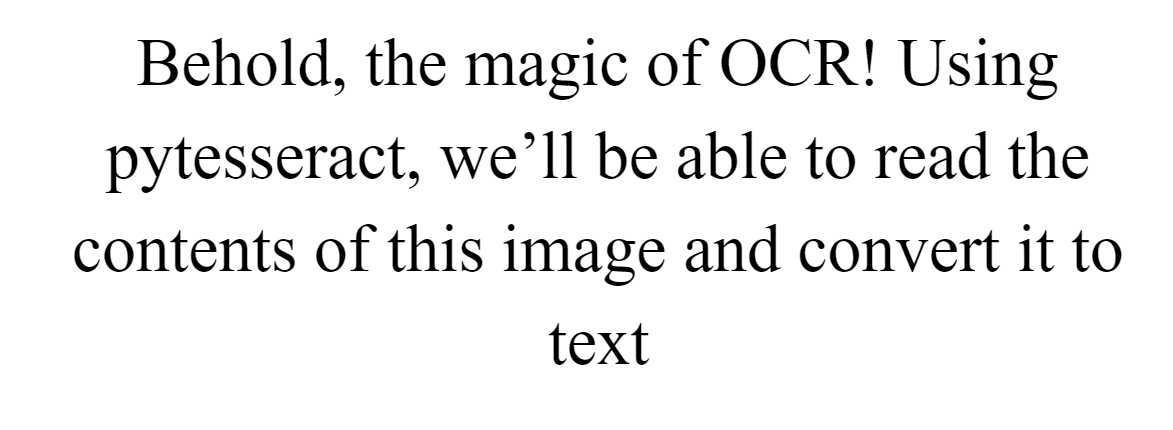

In [1]:
from PIL import Image

image = Image.open('images/text.png')
display(image)

Let's import pytesseract and check the functions available in the library using dir().

In [2]:
import pytesseract
dir(pytesseract)

['ALTONotSupported',
 'Output',
 'TSVNotSupported',
 'TesseractError',
 'TesseractNotFoundError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'get_languages',
 'get_tesseract_version',
 'image_to_alto_xml',
 'image_to_boxes',
 'image_to_data',
 'image_to_osd',
 'image_to_pdf_or_hocr',
 'image_to_string',
 'pytesseract',
 'run_and_get_output']

Using help() to check the documentation for the image_to_string() function, we can see that it takes an image as input and returns the text detected in the image.

In [3]:
help(pytesseract.image_to_string)

Help on function image_to_string in module pytesseract.pytesseract:

image_to_string(image, lang=None, config='', nice=0, output_type='string', timeout=0)
    Returns the result of a Tesseract OCR run on the provided image to string



First we need to install Tesseract OCR on our system and add the path to the tesseract.exe file to the PATH environment variable. We can download the installer from the Tesseract OCR GitHub repository (https://github.com/UB-Mannheim/tesseract/wiki) and run the installer.

If we run all together, we can see that the text in the image is correctly detected. The output includes new line characteres, and faithfully represents the text in the image.

In [4]:
from PIL import Image
import pytesseract

# Set the Tesseract executable path
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Open the image
image = Image.open('images/text.png')
# Extract the text from the image
text = pytesseract.image_to_string(image)
# Print the text
print(text)

Behold, the magic of OCR! Using
pytesseract, we’ll be able to read the
contents of this image and convert it to
text



### Image with noisy text

Sometimes the text in the image is not as clean as we would like. Let's see what happens when we use the same image as before, but with some noise added to it.
The image is the following:

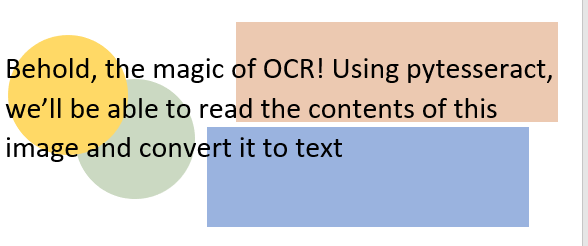

In [5]:
from PIL import Image
image = Image.open('images/noisy_text.png')
display(image)

This image has the same text as the previous one, but it has some shapes of different colors behing the text. Let's see what happens when we try to detect the text using the tesseract engine.

In [6]:
import pytesseract
text = pytesseract.image_to_string(image)
print(text)

e magic of OCR! Using pytesseract,
le to read the contents of this

d convert it to text



The output is not as good as before. The text is not correctly detected, and the output includes some characters that are not in the image. This is because the tesseract engine is not able to correctly detect the text in the image. Let's try to improve the output by **rezising the image**.

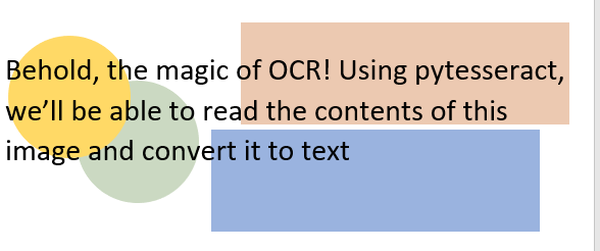

e magic of OCR! Using pytesseract,
le to read the contents of this
d convert it to text




In [7]:
import PIL
from PIL import Image
import pytesseract

# Set the base width of the image
basewidth = 600
# Open the image
image = Image.open('images/noisy_text.png')
# Calculate the ratio of the width to the base width
wpercent = (basewidth / float(image.size[0]))
# Calculate the height using the same ratio
hsize = int((float(image.size[1]) * float(wpercent)))
# Resize the image with the new width and height
# anti-aliasing is a high quality downsampling method, which helps to reduce the distortion
image = image.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
# Save the resized image
image.save('images/resized_noisy_text.png')
# Display the resized image
display(image)
# Extract the text from the resized image
text = pytesseract.image_to_string(image)
# Print the text
print(text)

There is no improvement in the output. Let's try to improve the output by converting the image to **grayscale**.
If we poke around in the PILLOW documentation we find that one of the easiest ways to do this is to use the convert() function and pass in the string 'L'.

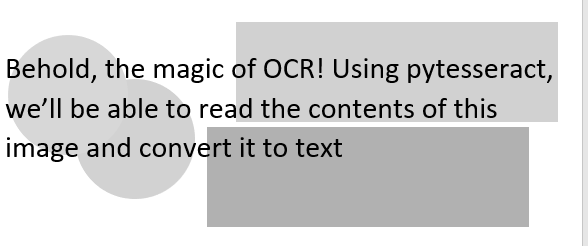

Behold, the magic of OCR! Using pytesseract,
we'll be able to read the contents of this
image and convert it to text



In [8]:
from PIL import Image
import pytesseract

# Open the image in grayscale
imge_gray = Image.open('images/noisy_text.png').convert('L')
display(imge_gray)
# Extract the text from the image
text = pytesseract.image_to_string(imge_gray)
# Print the text
print(text)

This works really well. The text is correctly detected. 

There is another approach called **binarization** that we can try. Binarization is the process of converting an image to only two colors. This is usually black and white, but it can also be some other combination of colors. Let's try to binarize the image using the convert() function and passing in the string '1'.
Binarization is enacted through a process called thresholding. If a pixel value is greater than a threshold value, it will be converted to a black pixel; if it is lower than the threshold it will be converted to a white pixel. This process eliminates noise in the OCR process allowing greater image recognition accuracy. 
With Pillow, this process is straightforward.

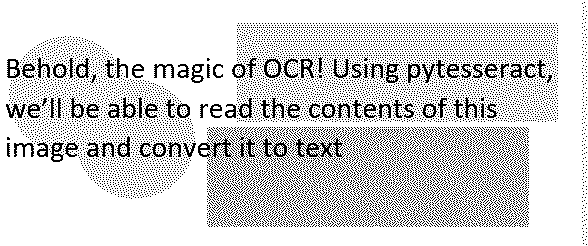

Behold, the magic of OCR! Using pytesseract,
we'll be able to read the. contents of this




In [9]:
from PIL import Image
import pytesseract

# Open the image in grayscale
image_binary = Image.open('images/noisy_text.png').convert('1')
# Save the image
image_binary.save('images/noisy_text_binary.png')
# Display the image
display(image_binary)
# Extract the text from the image
text = pytesseract.image_to_string(image_binary)
# Print the text
print(text)

The output is not as good as before. 
Anyway, we can write a function thta does the binarization, so we can input different threshold values and see the results.

In [10]:
def binarize(image_to_transform, threshold):
    """
    Binarize an image.
    :param image_to_transform: The image to binarize
    :param threshold: The threshold to use for deciding whether a given pixel should be black or white
    :return: The binarized image
    """
    # Convert to grayscale
    output_image=image_to_transform.convert("L")
    # Iterate through all pixels
    for x in range(output_image.width):
        for y in range(output_image.height):
            # For a given pixel, convert it to white if it is above the threshold, otherwise black
            if output_image.getpixel((x,y))< threshold:
                output_image.putpixel( (x,y), 0 )
            else:
                output_image.putpixel( (x,y), 255 )
    # Return the binarized image
    return output_image

Let's try this function over a range of threshold values and see what happens.

Trying with threshold 0


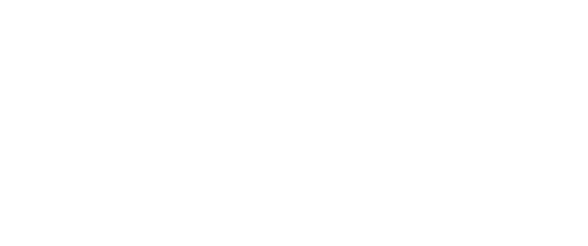


Trying with threshold 64


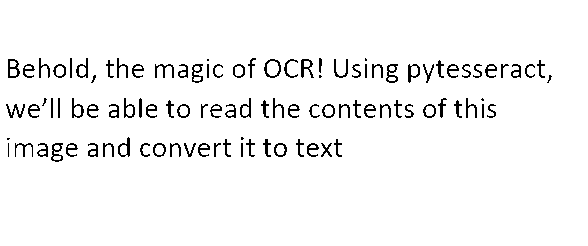

Behold, the magic of OCR! Using pytesseract,
we’ll be able to read the contents of this
image and convert it to text

Trying with threshold 128


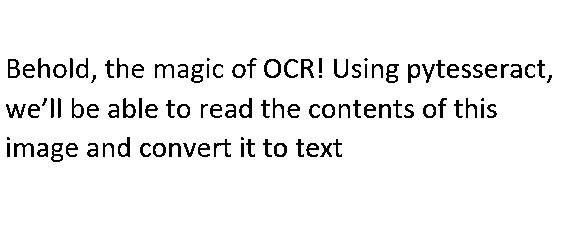

Behold, the magic of OCR! Using pytesseract,
we’ll be able to read the contents of this
image and convert it to text

Trying with threshold 192


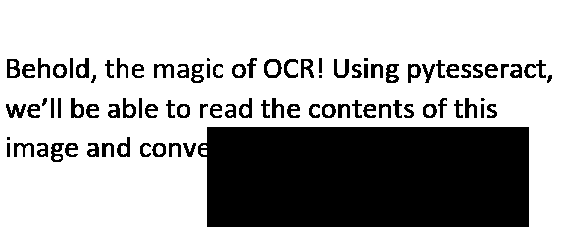

Behold, the magic of OCR! Using pytesseract,
we’ll be able to read the contents of this
image and conv


Trying with threshold 256


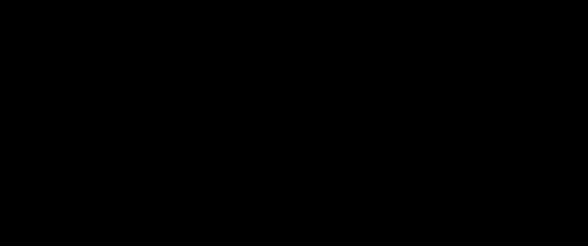

In [11]:
from PIL import Image
import pytesseract

image = Image.open('images/noisy_text.png')

for thresh in range(0, 257, 64):
    # Display the binarized image
    print("Trying with threshold " + str(thresh))
    display(binarize(image, thresh))
    # Extract the text from the binarized image
    text = pytesseract.image_to_string(binarize(image, thresh))
    print(text)

We can see from this that 
- a threshold of 0 essentially turns everything white, 
- that the text becomes more bold as we move towards a higher threshold, 
- and that the shapes, which have a filled in grey color, become more evident at higher thresholds.

### OCR on photographs

The next image is a photograph of a store front. Let's see what happens when we try to detect the text in the image.

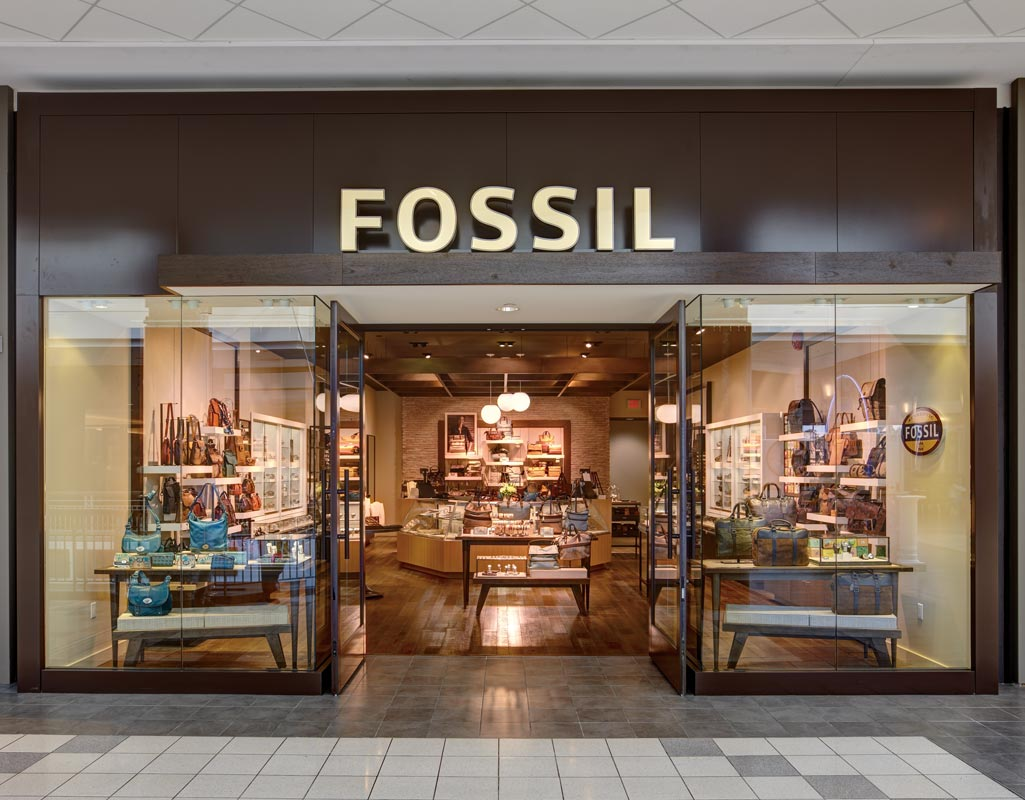

In [12]:
from PIL import Image
import pytesseract

# Open the image
image = Image.open('images/storefront.jpg')
display(image)
# Extract the text from the image
text = pytesseract.image_to_string(image)
# Print the text    
print(text)

The output is an empty string. This is because the tesseract engine is not able to take this image an pull out the name. Let's try to improve the output by cropping the image to only include the name of the store.

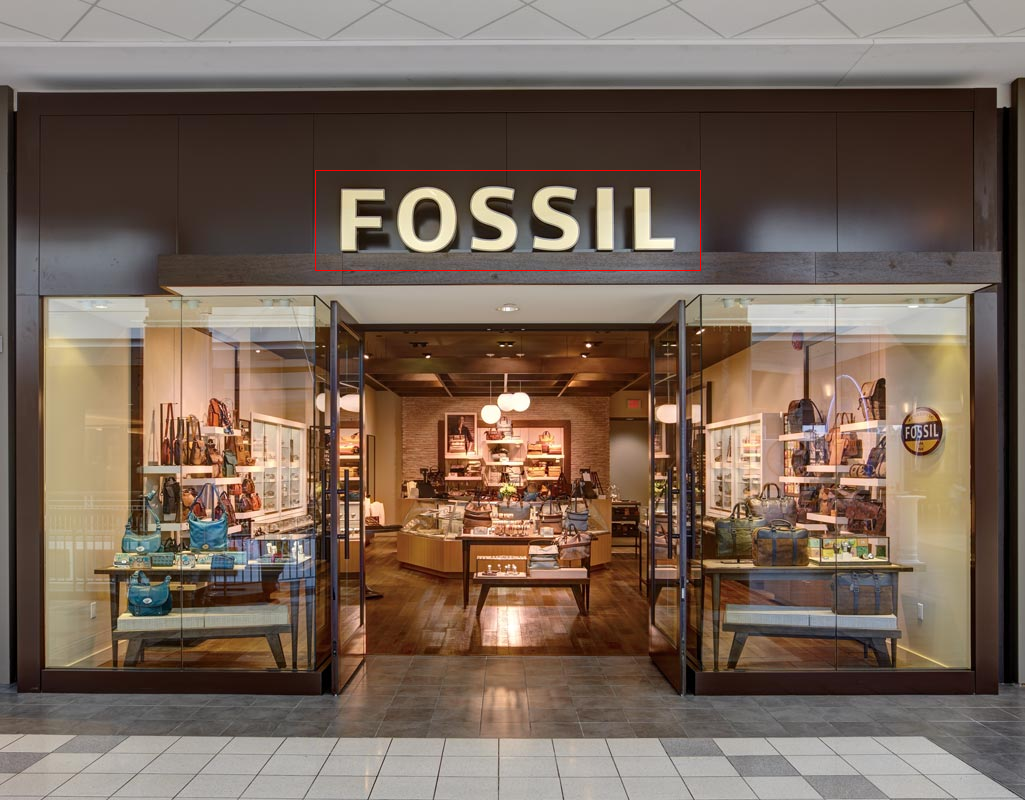

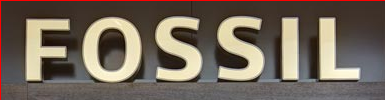

FOSSIL



In [13]:
from PIL import Image, ImageDraw
import pytesseract

# Open the image
image = Image.open('images/storefront.jpg')
# Set the bounding box dimensions
bounding_box = (315, 170, 700, 270)
# Draw the bounding box
draw = ImageDraw.Draw(image)
draw.rectangle(bounding_box, outline="red")
# Display the image
display(image)

# Crop the text area
cropped_image = image.crop(bounding_box)
# Display the cropped text area
display(cropped_image)
# Extract the text from the cropped image
text = pytesseract.image_to_string(cropped_image)
# Print the text
print(text)

If you look at the image, you can see that there is a small sign inside the store that has the shop name.
Let's try the same approach as before:

In [14]:
from PIL import Image, ImageDraw
import pytesseract

# Open the image
image = Image.open('images/storefront.jpg')
# Set the bounding box dimensions
bounding_box = (900, 420, 940, 445)
# Crop the text area
cropped_image = image.crop(bounding_box)
# Display the cropped text area
display(cropped_image)

OCR works better with higher resolution images. Let's increase the size of this image using the pillow resize() function, checking all the different resize options available.

0


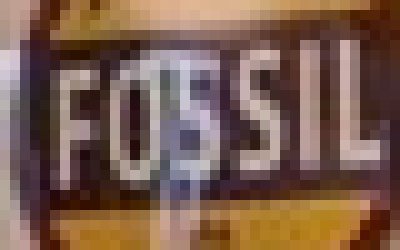

4


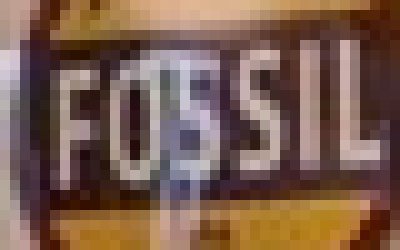

2


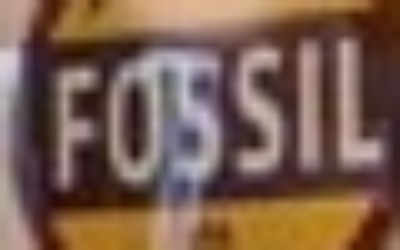

5


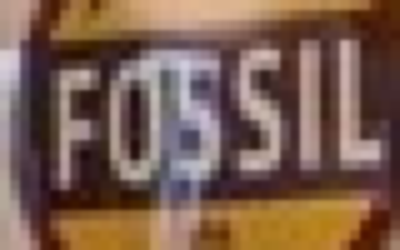

3


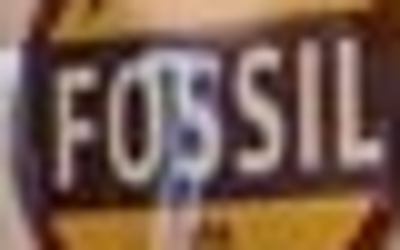

1


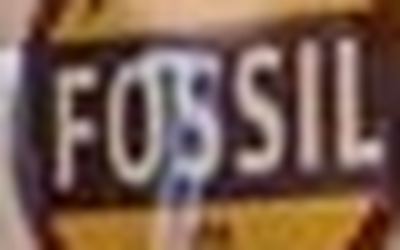

In [15]:
# Resize the image
new_size = (cropped_image.width * 10, cropped_image.height * 10)
# Display the resized image
options = [Image.NEAREST, Image.BOX, Image.BILINEAR, Image.HAMMING, Image.BICUBIC, Image.LANCZOS]
for option in options:
    # Print the option
    print(option)
    # Resize the image
    display(cropped_image.resize(new_size, option))

In this case, the Image.LANCZOS and Image.BICUBIC filters do a good job. Lets see if we are able to recognize the text off of this resized image.
To improve the output, we will use the binarization function we defined before with a range of threshold values.

Trying with threshold 151
FOSSIL



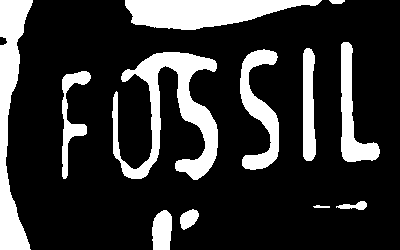

Trying with threshold 152
FOSSIL



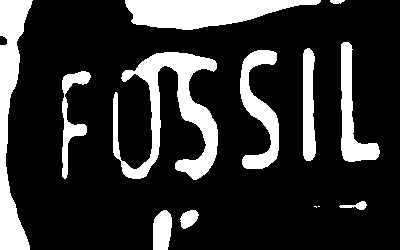

Trying with threshold 153
FOSSIL



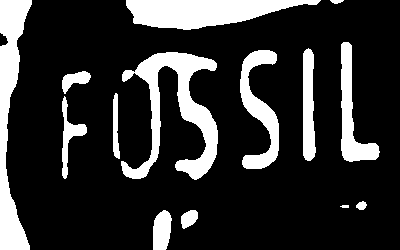

Trying with threshold 154
FOSSIL



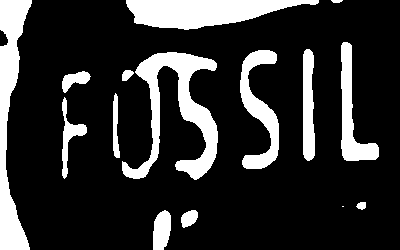

Trying with threshold 155
FSSIL



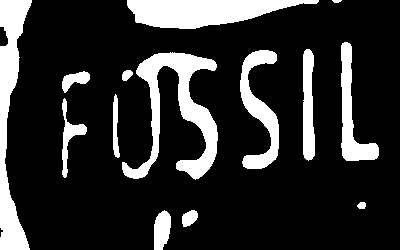

Trying with threshold 156
FASSIL



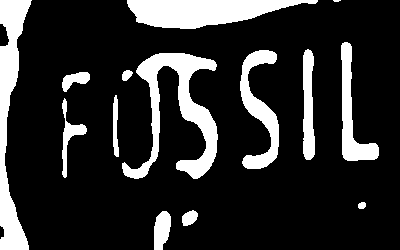

Trying with threshold 157
-OSSIL



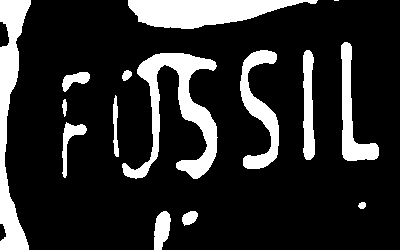

Trying with threshold 158
-OSSIL



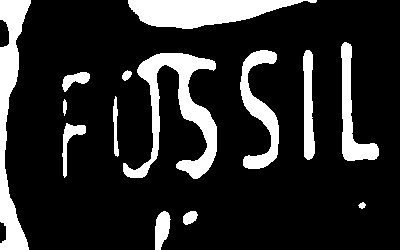

Trying with threshold 159
“ASSIL



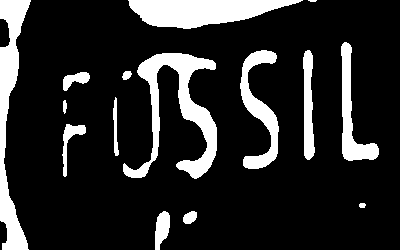

Trying with threshold 160
-ASSIL



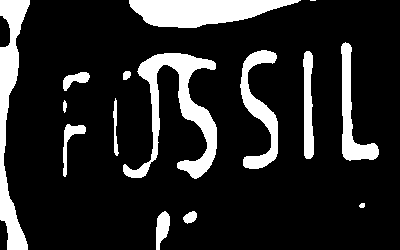

Trying with threshold 161
-TSSIL



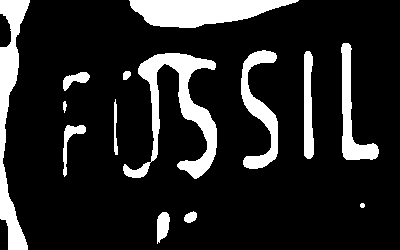

In [16]:
from PIL import Image
import pytesseract

# Function to binarize the image
def binarize(image_to_transform, threshold):
    """
    Binarize an image.
    :param image_to_transform: The image to binarize
    :param threshold: The threshold to use for deciding whether a given pixel should be black or white
    :return: The binarized image
    """
    # Convert to grayscale
    output_image=image_to_transform.convert("L")
    # Iterate through all pixels
    for x in range(output_image.width):
        for y in range(output_image.height):
            # For a given pixel, convert it to white if it is above the threshold, otherwise black
            if output_image.getpixel((x,y))< threshold:
                output_image.putpixel( (x,y), 0 )
            else:
                output_image.putpixel( (x,y), 255 )
    # Return the binarized image
    return output_image


# Open the image
image = Image.open('images/storefront.jpg')
# Set the bounding box dimensions
bounding_box = (900, 420, 940, 445)
# Crop the text area
cropped_image = image.crop(bounding_box)
# Resize the image
new_size = (cropped_image.width * 10, cropped_image.height * 10)
bigger_image = cropped_image.resize(new_size, Image.BICUBIC)
# Binarize the image
for thresh in range(150, 170):
    # Extract the text from the binarized image
    text = pytesseract.image_to_string(binarize(bigger_image, thresh))
    if text != '':
        # Display the binarized image
        print("Trying with threshold " + str(thresh))
        print(text)
        display(binarize(bigger_image, thresh))

We can see that the text is correctly detected for a threshold value of 150-154.

### Conclusion

In conclusion, the combination of pytesseract and Pillow provides a powerful and versatile solution for text detection in both images with text and photographs. The advantages of using these systems are:

1. **Accuracy:** pytesseract leverages the Tesseract OCR engine, which is renowned for its accuracy in recognizing and extracting text from various sources. This ensures reliable results when dealing with different types of images.

2. **Ease of use:** The integration of pytesseract with Pillow simplifies the process of loading and preprocessing images, making it straightforward to prepare the images for text extraction. The intuitive interfaces and extensive documentation of both libraries facilitate seamless implementation.

3. **Flexibility:** With pytesseract and Pillow, you can handle a wide range of image formats, including common image files and photographs. This versatility enables text detection not only in scanned documents but also in real-world scenarios where photographs are the primary source of text.

4. **Customization:** pytesseract allows for configuration tweaks and parameter adjustments, giving you the flexibility to fine-tune the OCR process according to your specific requirements. This capability can enhance the accuracy and performance of the text detection system.

By leveraging the strengths of pytesseract and Pillow, developers can harness the power of optical character recognition and image processing to extract text effectively from various image sources, opening up possibilities for automating tasks that involve text extraction from images and photographs.